# Gradient Descent Equations

Boise State University\
Department of Computer Science\
CS 334 Algorithms of Machine Learning\
Conrad Kennington\
Fall 2020

### First... the cost function for Linear Regression

Given a sequence of points,  yi , and a sequence of points predicted by our model,  ŷ i , RSS is:

 $$ \text{error}_{(m, b)} = \sum_{i=1}^n(y_i - \hat{y_i}) $$

Our objective is to minimize this value. Inserting our linear regression model in for the  ŷ i  predictions, and assuming (for the sake of simplicty) that we're doing regression on only one variable, we get:

$$ \text{RSS} = \sum_{i=1}^n (y_i - (m x_i + b))^2 $$

Where  b  is the intercept and  m  is the slope of the line of best fit.

### Now we need to take the gradient. 

Since this is an equation of two variables ( b  and  m ) the gradient will consist of two partial derivatives. Hence the gradient is:

$$ \Big< \frac{\partial}{\partial b}(\text{RSS}),  \frac{\partial}{\partial m}(\text{RSS}) \Big> = 
\Big< -2\sum_{i=1}^n(y_i - (mx_i + b)), -2\sum_{i=1}^n x_i(y_i - (mx_i +b)) \Big> $$

To solve, take a step in the negative gradient direction every iteration. Eventually we will have something that converges.

Let's implement and test this (note that for the implementation we'll actually use MSE, mean squared error. MSE is just RSS divided by the number of points,  n . We do that because it leads to "nicer" input numbers, as RSS is a really big number).

In [74]:
import numpy as np

class GradientDescentLinearRegression:
    def __init__(self, learning_rate=0.01, iterations=5):
        self.learning_rate, self.iterations = learning_rate, iterations
    
    def fit(self, X, y):
        # Start in a random place... why not y = 1x + 0
        b = 0 # y intercept starts at 0
        m = 1 # Slope starts with going up 1, over 1
        total_points = X.shape[0] # Get the number of points
        # Loop over the number of iterations it takes to find the lowest cost (best fit)
        for _ in range(self.iterations):
            b_gradient = -2 * np.sum(y - (m * X) + b) / total_points
            m_gradient = -2 * np.sum(X * (y - ((m * X) + b))) / total_points
            b = b + (self.learning_rate * b_gradient)
            m = m - (self.learning_rate * m_gradient)
        self.m, self.b = m, b
        
    def predict(self, X):
        print("Slope {}, Y Intercept {}".format(self.m*X, self.b))
        return self.m*X + self.b

That's all we need! OK, let's see how this performs on some example data. We'll generate a cloud of points that's normally distributed around the line  y=x , and see what our algorithm cooks up.

In [75]:
np.random.seed(58)
# This generates random numbers in two numpy arrays, and sorts them so they appear to have a linear relationship
X = np.array(sorted(list(range(1))*20)) + np.random.normal(size=20, scale=0.5)
y = np.array(sorted(list(range(1))*20)) + np.random.normal(size=20, scale=0.25)

Slope [-0.37035098 -1.02385934 -0.39450098 -0.00366229 -0.8303383   0.28325106
 -0.47215205 -0.7214722  -0.25496442  0.61729435  0.08399693 -0.59785168
 -0.34630554  0.48483099 -0.64024355  0.48084511 -0.23072244 -0.36234921
  0.74303905  1.02739813], Y Intercept -0.010157620093537358


Text(0.5, 1.0, 'Gradient Descent Linear Regressor')

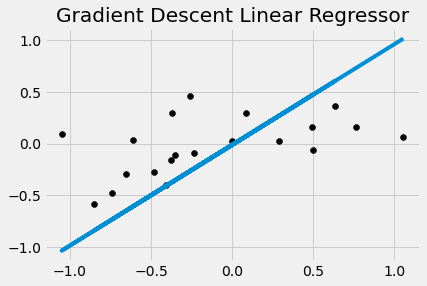

In [76]:
clf = GradientDescentLinearRegression()
clf.fit(X, y)

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # Replicates style of FiveThirtyEight.com, a polling website

plt.scatter(X, y, color='black')
plt.plot(X, clf.predict(X))
plt.gca().set_title("Gradient Descent Linear Regressor")

The biggest advantage gradient descent has is that it requires no knowledge whatsoever of the fundamentals of the model. We can apply the classifier we've built without knowing anything about linear regression. In particular, we don't need to know that linear regression has a closed-form solution, or what that solution looks like, or how to derive it. Instead we just pick a metric, compute its derivative, and then use a computer to brute-force a solution.

This is wasteful for simple ordinary least squares, because we have a way of solving this already, sure. But it's a boon if we start to come up with custom metrics, or do other similar things.

A gradient descent solution to modeling can be applied to any model metric, so long as the metric has two properties: it's differentiable (most things are) and concave. Concavity is the property that no matter where you are on the metric surface, the derivative will point towards a point with better "fit", right up until you get to the bottom of the thing. Things that are concave include funnels, eye contacts, and, it turns out, the linear regression parameter space.

In the case of neural networks, come up with a parameter surface so complex no statistical theory can contain it, and brute forcing a solution becomes the only way to build a model.

There are many, many ways in which this process can be optimized, generalized, and tweaked, most of which find their way into practical ML. There's also a whole mathematical subfield, convex optimization, concerned with this very practical problem space.